# Machine Predictive Maintenance

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

Attribute Information:

The dataset consists of 10 000 data points stored as rows with 14 features in columns
UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes
tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

import warnings
warnings.filterwarnings('ignore') 

In [372]:
df=pd.read_csv('predictive_maintenance.csv')

In [373]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [374]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [375]:
df.shape

(10000, 8)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [377]:
df.rename({'Air temperature [K]': 'Air_temperature_K','Process temperature [K]': 'Process_temperature_K','Rotational speed [rpm]': 'Rotational_speed_rpm','Torque [Nm]': 'Torque_Nm','Tool wear [min]': 'Tool_wear_min','Failure Type': 'Failure_Type'}, axis=1, inplace=True)
df.head()

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Target,Failure_Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [378]:
df.isnull().sum()* 100 / len(df) #% null values in columns

Type                     0.0
Air_temperature_K        0.0
Process_temperature_K    0.0
Rotational_speed_rpm     0.0
Torque_Nm                0.0
Tool_wear_min            0.0
Target                   0.0
Failure_Type             0.0
dtype: float64

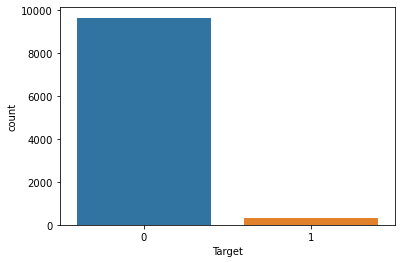

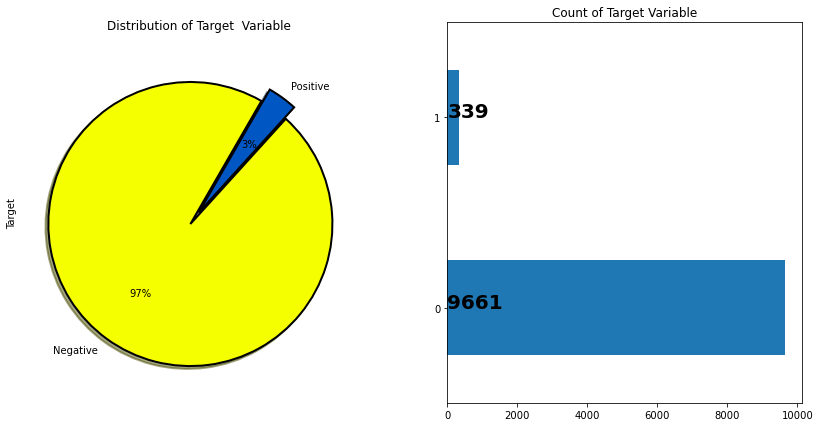

In [379]:
#Distribution of Target Variable
sns.countplot(df['Target'],data=df)

# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)

df["Target"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Negative","Positive"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  Variable")

plt.subplot(122)
ax = df["Target"].value_counts().plot(kind="barh")

for i,j in enumerate(df["Target"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Target Variable")
plt.show()

(-1.217584817483659,
 1.2097676237996229,
 -1.0974527060610335,
 1.116602355989525)

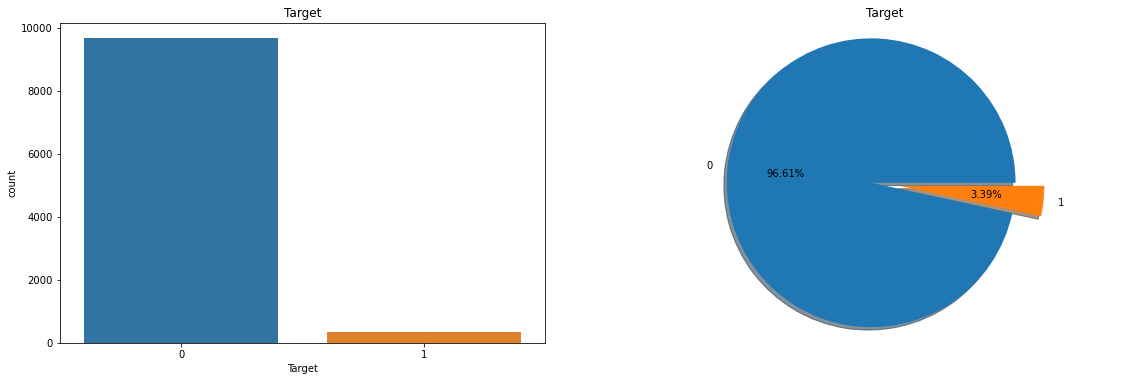

In [380]:
plt.figure(figsize=(40,20))

plt.subplot(3,4,1)
sns.countplot(df.Target)
plt.title('Target') 
plt.subplot(3,4,2)
Target = df.Target.value_counts()
plt.pie(Target,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Target.index)
plt.title('Target')
plt.axis('equal')


Text(0.5, 1.0, 'Failure_Type')

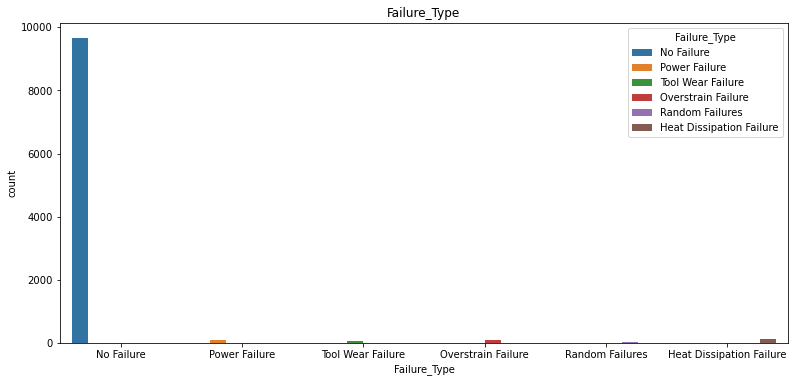

In [381]:
plt.figure(figsize=(60,20))

plt.subplot(3,4,3)
sns.countplot(df.Failure_Type,hue=df.Failure_Type)
plt.title('Failure_Type') 


(-1.2176220931835324, 1.21036128190381, -1.0969958252765493, 1.116975975713299)

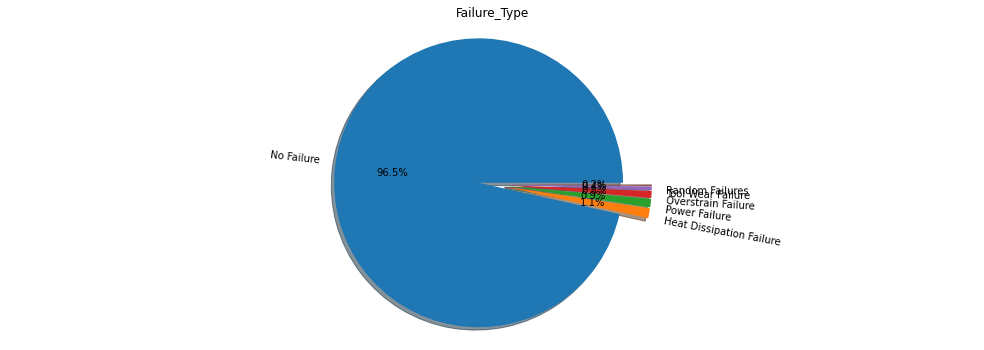

In [382]:
plt.figure(figsize=(80,20))
plt.subplot(3,4,4)
Failure_Type = df.Failure_Type.value_counts()
plt.pie(Failure_Type,explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%0.1f%%',shadow=True,labels=Failure_Type.index,rotatelabels=True)
plt.title('Failure_Type')
plt.axis('equal')

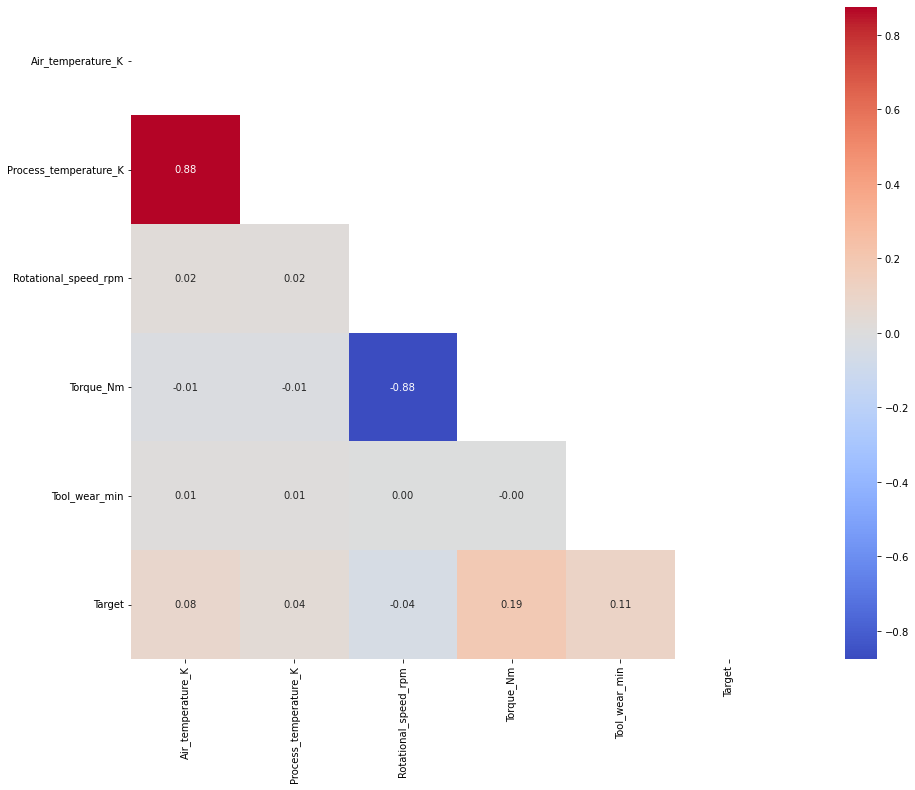

In [383]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

In [384]:
df = pd.get_dummies(data=df, columns=['Type'],drop_first=True)
df.head()

,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Target,Failure_Type,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,No Failure,0,1
1,298.2,308.7,1408,46.3,3,0,No Failure,1,0
2,298.1,308.5,1498,49.4,5,0,No Failure,1,0
3,298.2,308.6,1433,39.5,7,0,No Failure,1,0
4,298.2,308.7,1408,40.0,9,0,No Failure,1,0


# Analysis1-Prediction for Target class(Failure or no failure- Binary Classification)

In [385]:
X = df.drop(['Target','Failure_Type'],axis=1)
  
X.head()

,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,1
1,298.2,308.7,1408,46.3,3,1,0
2,298.1,308.5,1498,49.4,5,1,0
3,298.2,308.6,1433,39.5,7,1,0
4,298.2,308.7,1408,40.0,9,1,0


In [386]:
X.shape

(10000, 7)

In [387]:
y = df['Target']
y.shape

(10000,)

In [388]:
y.value_counts()

0    9661
1     339
Name: Target, dtype: int64

### As the target variable is highly imbalanced, we'll use SMOTE method to balance the target variable

In [389]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [390]:
X, y = smote.fit_resample(X, y)

In [391]:
y.value_counts() 

0    9661
1    9661
Name: Target, dtype: int64

In [392]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [393]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5) 
rfc.fit(X_train,y_train)
prediction_rfc = rfc.predict(X_test)
rfc.score(X_test,y_test)
print("Random Forest accuracy: {} ".format(rfc.score(X_test,y_test)))
print("")
print("Confusion_matrix:")
print("")
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_rfc))
print("")
print(classification_report(y_test,prediction_rfc))

Random Forest accuracy: 0.9746442432082795 

Confusion_matrix:

[[1863   71]
 [  27 1904]]

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1934
           1       0.96      0.99      0.97      1931

    accuracy                           0.97      3865
   macro avg       0.97      0.97      0.97      3865
weighted avg       0.97      0.97      0.97      3865



In [394]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [395]:
cv = ShuffleSplit(n_splits=10,test_size=0.25, random_state=42)
rfc_val = cross_val_score(rfc,X,y,cv=cv)
rfc_accuracy = np.mean(abs(rfc_val))
rfc_accuracy

0.9718691782239702

### We'll compare the results with different algorithms 

In [396]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

ModelLR = LogisticRegression()
ModelRF = RandomForestClassifier(n_estimators=5)
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier()

In [397]:
MM = [ModelLR, ModelRF,ModelKNN,ModelLGB,ModelGNB,ModelXGB]
score_test_list = []
score_train_list = []
recall_list = [] 
precision_list = []
f1Score_list = []
accuracy_list = []

for models in MM:
    models.fit(X_train, y_train)
    score_train = models.score(X_train,y_train)
    score_test = models.score(X_test,y_test)

     
    
    # Prediction
    
    y_pred = models.predict(X_test)
    y_pred_prob = models.predict_proba(X_test)
    
    
     # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred
    
    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)

    
    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)


    # classification report for precision, recall f1-score and accuracy


    # calculating the metrics

    recall = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    f1Score_list.append(f1Score)
    
    score_test_list.append(score_test)
    score_train_list.append(score_train)
    


In [398]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'KNeighbors Classifier','LGBM Classifier','GaussianNB','XGBClassifier'
             ],
    
    'Score_train': [score_train_list[0], score_train_list[1],score_train_list[2] ,score_train_list[3] ,score_train_list[4],score_train_list[5]   
                   ],
    'Score_test': [score_test_list[0], score_test_list[1], score_test_list[2] , score_test_list[3] , score_test_list[4] , score_test_list[5]   
                   ],
    'Recall': [recall_list[0], recall_list[1], recall_list[2], recall_list[3], recall_list[4], recall_list[5] 
                   ],               

    'Precision': [precision_list[0], precision_list[1], precision_list[2], precision_list[3], precision_list[4], precision_list[5] 
                   ], 

    'F1 Score': [f1Score_list[0], f1Score_list[1], f1Score_list[2], f1Score_list[3], f1Score_list[4], f1Score_list[5] 
                   ],

})


In [399]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test,Recall,Precision,F1 Score
5,XGBClassifier,0.999094,0.988616,0.994,0.984,0.989
1,Random Forest Classifier,0.996959,0.973351,0.987,0.961,0.974
3,LGBM Classifier,0.993983,0.983441,0.992,0.975,0.984
2,KNeighbors Classifier,0.950184,0.944631,0.984,0.912,0.947
0,Logistic Regression,0.852753,0.861320,0.866,0.858,0.862
4,GaussianNB,0.841237,0.847865,0.891,0.820,0.854


In [400]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Recall,Precision,F1 Score,Score_diff
2,KNeighbors Classifier,0.950184,0.944631,0.984,0.912,0.947,0.005553
4,GaussianNB,0.841237,0.847865,0.891,0.820,0.854,0.006628
0,Logistic Regression,0.852753,0.861320,0.866,0.858,0.862,0.008567
5,XGBClassifier,0.999094,0.988616,0.994,0.984,0.989,0.010478
3,LGBM Classifier,0.993983,0.983441,0.992,0.975,0.984,0.010542
1,Random Forest Classifier,0.996959,0.973351,0.987,0.961,0.974,0.023609


In [401]:
### Create a Pickle file using serialization. We'll use rfc model.
import pickle
pickle_out = open("rfc.pkl","wb")
pickle.dump(rfc, pickle_out)
pickle_out.close()

# Analysis2 Failure Type as a Target Variable(Multi class classification)

In [402]:
df['Failure_Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure_Type, dtype: int64

Note- We have random failures in dataset which we can not predict, hence we shall remove these datapoints 

In [403]:
idx_RNF = df.loc[df['Failure_Type']=='Random Failures'].index
df.loc[idx_RNF,'Failure_Type']

1221    Random Failures
1302    Random Failures
1748    Random Failures
2072    Random Failures
2559    Random Failures
3065    Random Failures
3452    Random Failures
5471    Random Failures
5489    Random Failures
5495    Random Failures
5509    Random Failures
5553    Random Failures
5639    Random Failures
6091    Random Failures
6913    Random Failures
6960    Random Failures
7488    Random Failures
7868    Random Failures
Name: Failure_Type, dtype: object

In [404]:
df_without_RF = df[df['Failure_Type']!='Random Failures']

In [405]:
y = df_without_RF['Failure_Type']
y.shape

(9982,)

In [406]:
y.value_counts() 

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure_Type, dtype: int64

In [407]:
X = df_without_RF.drop(['Target','Failure_Type'],axis=1)
  
X.head()

,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,1
1,298.2,308.7,1408,46.3,3,1,0
2,298.1,308.5,1498,49.4,5,1,0
3,298.2,308.6,1433,39.5,7,1,0
4,298.2,308.7,1408,40.0,9,1,0


In [408]:
X, y = smote.fit_resample(X, y) # Again using SMOTE method to balance the failure types in the dataset

In [409]:
y.value_counts() 

No Failure                  9652
Power Failure               9652
Tool Wear Failure           9652
Overstrain Failure          9652
Heat Dissipation Failure    9652
Name: Failure_Type, dtype: int64

In [410]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [411]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=5) 
rfc2.fit(X_train,y_train)
prediction_rfc2 = rfc2.predict(X_test)
rfc2.score(X_test,y_test)
print("Random Forest accuracy: {} ".format(rfc2.score(X_test,y_test)))
print("")
print("Confusion_matrix:")
print("")
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_rfc2))
print("")
print(classification_report(y_test,prediction_rfc2))

Random Forest accuracy: 0.9940944881889764 

Confusion_matrix:

[[1872    4    1    0    0]
 [   9 1910    5    5   26]
 [   0    0 1938    0    0]
 [   0    3    0 1982    0]
 [   0    4    0    0 1893]]

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      1877
              No Failure       0.99      0.98      0.99      1955
      Overstrain Failure       1.00      1.00      1.00      1938
           Power Failure       1.00      1.00      1.00      1985
       Tool Wear Failure       0.99      1.00      0.99      1897

                accuracy                           0.99      9652
               macro avg       0.99      0.99      0.99      9652
            weighted avg       0.99      0.99      0.99      9652



In [412]:
y.value_counts() 

No Failure                  9652
Power Failure               9652
Tool Wear Failure           9652
Overstrain Failure          9652
Heat Dissipation Failure    9652
Name: Failure_Type, dtype: int64

In [413]:
#Numeric encoding for failure types
df_without_RF['Failure_Type'] = df_without_RF['Failure_Type'].replace('No Failure', 0)
df_without_RF['Failure_Type'] = df_without_RF['Failure_Type'].replace('Power Failure', 1)
df_without_RF['Failure_Type'] = df_without_RF['Failure_Type'].replace('Tool Wear Failure', 2)
df_without_RF['Failure_Type'] = df_without_RF['Failure_Type'].replace('Overstrain Failure', 3)
df_without_RF['Failure_Type'] = df_without_RF['Failure_Type'].replace('Heat Dissipation Failure', 4)

In [414]:
y = df_without_RF['Failure_Type']
y.shape

(9982,)

In [415]:
X = df_without_RF.drop(['Target','Failure_Type'],axis=1)
X.shape

(9982, 7)

In [416]:
X, y = smote.fit_resample(X, y)

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [418]:
MM = [ModelLR, ModelRF,ModelKNN,ModelLGB,ModelGNB,ModelXGB]
score_test_list = []
score_train_list = []
recall_list = [] 
precision_list = []
f1Score_list = []
accuracy_list = []

for models in MM:
    models.fit(X_train, y_train)
    score_train = models.score(X_train,y_train)
    score_test = models.score(X_test,y_test)

     
    
    # Prediction
    
    y_pred = models.predict(X_test)
    y_pred_prob = models.predict_proba(X_test)
    
    
     # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred
    
    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)

    
    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)


    # classification report for precision, recall f1-score and accuracy


    # calculating the metrics

    recall = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    f1Score_list.append(f1Score)
    
    score_test_list.append(score_test)
    score_train_list.append(score_train)
    


[18:36:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [419]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'KNeighbors Classifier','LGBM Classifier','GaussianNB','XGBClassifier'
             ],
    
    'Score_train': [score_train_list[0], score_train_list[1],score_train_list[2] ,score_train_list[3] ,score_train_list[4],score_train_list[5]   
                   ],
    'Score_test': [score_test_list[0], score_test_list[1], score_test_list[2] , score_test_list[3] , score_test_list[4] , score_test_list[5]   
                   ],
    'Recall': [recall_list[0], recall_list[1], recall_list[2], recall_list[3], recall_list[4], recall_list[5] 
                   ],               

    'Precision': [precision_list[0], precision_list[1], precision_list[2], precision_list[3], precision_list[4], precision_list[5] 
                   ], 

    'F1 Score': [f1Score_list[0], f1Score_list[1], f1Score_list[2], f1Score_list[3], f1Score_list[4], f1Score_list[5] 
                   ],

})


In [420]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test,Recall,Precision,F1 Score
5,XGBClassifier,1.000000,0.995856,0.999,0.998,0.998
3,LGBM Classifier,1.000000,0.995545,0.999,0.998,0.999
1,Random Forest Classifier,0.999482,0.992955,0.997,0.995,0.996
2,KNeighbors Classifier,0.978036,0.972441,0.999,0.989,0.994
4,GaussianNB,0.872254,0.870597,0.956,0.919,0.937
0,Logistic Regression,0.865598,0.864588,0.997,0.979,0.988


In [421]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Recall,Precision,F1 Score,Score_diff
0,Logistic Regression,0.865598,0.864588,0.997,0.979,0.988,0.001010
4,GaussianNB,0.872254,0.870597,0.956,0.919,0.937,0.001658
5,XGBClassifier,1.000000,0.995856,0.999,0.998,0.998,0.004144
3,LGBM Classifier,1.000000,0.995545,0.999,0.998,0.999,0.004455
2,KNeighbors Classifier,0.978036,0.972441,0.999,0.989,0.994,0.005595
1,Random Forest Classifier,0.999482,0.992955,0.997,0.995,0.996,0.006527


In [422]:
### Create a Pickle file using serialization. We'll use Random Forest model.
import pickle
pickle_out = open("rfc2.pkl","wb")
pickle.dump(rfc2, pickle_out)
pickle_out.close()